## Importing the data and necessary libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [70]:
height = np.random.randint(4,7, size = 100)
height_float = np.random.randint(1, 10, size = 100)
weight = np.random.randint(40000, 90000, size = 100)

In [71]:
df = pd.DataFrame(columns=['height(ft)', 'weight(gms)'])

In [72]:
df['height(ft)'] = height + 0.1*height_float
df['weight(gms)'] = weight

## Understanding the data

In [73]:
df.head(10)

,height(ft),weight(gms)
0,5.4,60524
1,5.7,52078
2,4.9,54226
3,5.8,61932
4,6.9,47514
5,4.5,89525
6,6.1,42218
7,6.3,82119
8,4.6,62690
9,4.1,70706


In [74]:
df.tail(10)

,height(ft),weight(gms)
90,5.6,57399
91,4.5,64416
92,5.5,79633
93,4.7,79091
94,4.6,64508
95,6.5,72645
96,5.7,73838
97,6.1,72596
98,4.6,69105
99,6.1,75539


In [75]:
df.shape

(100, 2)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   height(ft)   100 non-null    float64
 1   weight(gms)  100 non-null    int32  
dtypes: float64(1), int32(1)
memory usage: 1.3 KB


In [77]:
df.isna().sum()

height(ft)     0
weight(gms)    0
dtype: int64

In [78]:
df.describe()

,height(ft),weight(gms)
count,100.000000,100.000000
mean,5.379000,63720.020000
std,0.826126,14208.579583
min,4.100000,40440.000000
25%,4.675000,52087.000000
50%,5.350000,62597.500000
75%,6.100000,74693.000000
max,6.900000,89809.000000


## Normalising the data

1. The maximum absolute scaling
2. The min-max feature scaling
3. The z-score method
4. The robust scaling

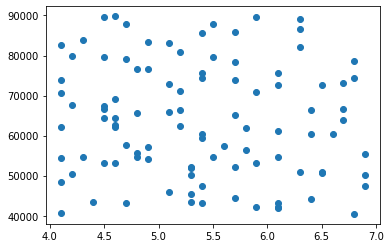

In [79]:
plt.scatter(df['height(ft)'], df['weight(gms)'])

### 1. Maximum absolute scaling

In [93]:
#creating a copy of the dataset
max_df = df.copy()

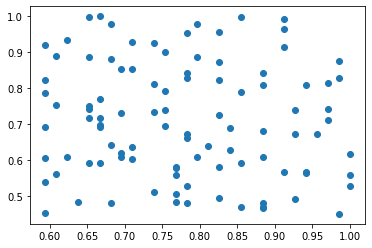

In [94]:
for col in max_df.columns:
    max_df[col] = max_df[col]/max_df[col].abs().max()
plt.scatter(max_df['height(ft)'], max_df['weight(gms)'])

In [95]:
max_df.head(10)

,height(ft),weight(gms)
0,0.782609,0.673919
1,0.826087,0.579875
2,0.710145,0.603792
3,0.840580,0.689597
4,1.000000,0.529056
5,0.652174,0.996838
6,0.884058,0.470087
7,0.913043,0.914374
8,0.666667,0.698037
9,0.594203,0.787293


In [96]:
max_df.describe()

,height(ft),weight(gms)
count,100.000000,100.000000
mean,0.779565,0.709506
std,0.119728,0.158209
min,0.594203,0.450289
25%,0.677536,0.579975
50%,0.775362,0.697007
75%,0.884058,0.831687
max,1.000000,1.000000


### 2. Min-Max feature scaling

In [92]:
#creating a copy of the dataset
minmax_df = df.copy()

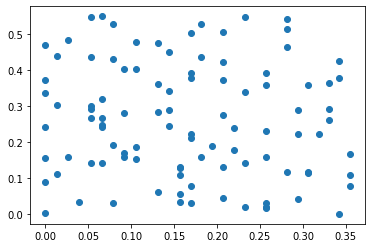

In [97]:
for col in minmax_df.columns:
    minmax_df[col] = (minmax_df[col] - minmax_df[col].min())/(max_df[col] + minmax_df[col].max())
plt.scatter(minmax_df['height(ft)'], minmax_df['weight(gms)'])

In [98]:
minmax_df.head(10)

,height(ft),weight(gms)
0,0.169213,0.223628
1,0.207091,0.129585
2,0.105123,0.153503
3,0.219622,0.239306
4,0.354430,0.078767
5,0.052965,0.546543
6,0.256935,0.019797
7,0.281580,0.464080
8,0.066079,0.247746
9,0.000000,0.337001


In [99]:
minmax_df.describe()

,height(ft),weight(gms)
count,100.000000,100.000000
mean,0.164929,0.259215
std,0.104760,0.158207
min,0.000000,0.000000
25%,0.075877,0.129685
50%,0.162853,0.246716
75%,0.256935,0.381395
max,0.354430,0.549705


### 3. Z-Score method

In [100]:
#creating a copy of the dataset
zscore_df = df.copy()

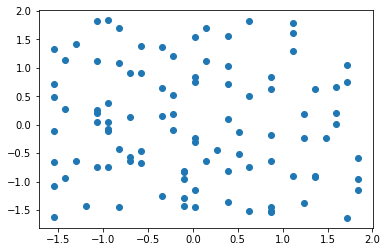

In [101]:
for col in zscore_df.columns:
    zscore_df[col] = (zscore_df[col] - zscore_df[col].mean())/zscore_df[col].std()
plt.scatter(zscore_df['height(ft)'], zscore_df['weight(gms)'])

In [102]:
zscore_df.head(10)

,height(ft),weight(gms)
0,0.025420,-0.224936
1,0.388561,-0.819366
2,-0.579815,-0.668189
3,0.509608,-0.125841
4,1.841124,-1.140580
5,-1.064003,1.816155
6,0.872748,-1.513312
7,1.114842,1.294920
8,-0.942956,-0.072493
9,-1.548190,0.491673


In [103]:
zscore_df.describe()

,height(ft),weight(gms)
count,1.000000e+02,1.000000e+02
mean,-2.726708e-15,2.486900e-16
std,1.000000e+00,1.000000e+00
min,-1.548190e+00,-1.638448e+00
25%,-8.521705e-01,-8.187321e-01
50%,-3.510361e-02,-7.900297e-02
75%,8.727484e-01,7.722785e-01
max,1.841124e+00,1.836143e+00


### 4. Robust Scaling 

In [104]:
#creating a copy of the dataset
robust_df = df.copy()

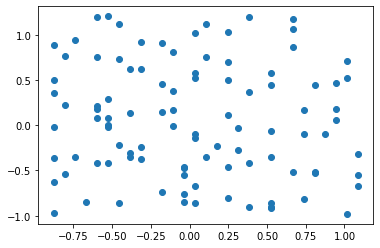

In [107]:
for col in robust_df.columns:
    robust_df[col] = (robust_df[col] - robust_df[col].median())  / (robust_df[col].quantile(0.75) - robust_df[col].quantile(0.25))
plt.scatter(robust_df['height(ft)'], robust_df['weight(gms)'])

In [108]:
robust_df.head(10)

,height(ft),weight(gms)
0,0.035088,-0.091723
1,0.245614,-0.465341
2,-0.315789,-0.370322
3,0.315789,-0.029439
4,1.087719,-0.667234
5,-0.596491,1.191166
6,0.526316,-0.901508
7,0.666667,0.863554
8,-0.526316,0.004092
9,-0.877193,0.358688


In [109]:
robust_df.describe()

,height(ft),weight(gms)
count,100.000000,100.000000
mean,0.020351,0.049656
std,0.579737,0.628531
min,-0.877193,-0.980160
25%,-0.473684,-0.464943
50%,0.000000,0.000000
75%,0.526316,0.535057
max,1.087719,1.203729


## Comparing all four scalers 

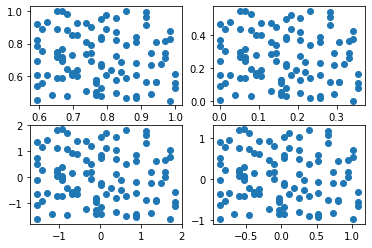

In [114]:
plt.subplot(2, 2, 1)
plt.scatter(max_df['height(ft)'], max_df['weight(gms)'])

plt.subplot(2, 2, 2)
plt.scatter(minmax_df['height(ft)'], minmax_df['weight(gms)'])

plt.subplot(2, 2, 3)
plt.scatter(zscore_df['height(ft)'], zscore_df['weight(gms)'])

plt.subplot(2, 2, 4)
plt.scatter(robust_df['height(ft)'], robust_df['weight(gms)'])